# PART 2 

## Jessica Llanos 327083184 Rita Kaplan 321775579

we start with preproccesing the test data same way we did in train 

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(10,10)}) # settings for seaborn plot sizes

In [3]:
df = pd.read_csv(r"./marketing_campaigns_test.csv", index_col= 0)

In [4]:
print("Shape: ", df.shape)
df.head()

Shape:  (14694, 18)


,status,age,n_child,education,profession,device,account_balance,loan,mortgage,credit,positive,campaign_type,n_contact,l_date,l_call_duration,p_outcome,n_p_contact,p_days
id,,,,,,,,,,,,,,,,,,
512496,divorced,37,unknown,master,scientist,cellular,-12,False,True,False,False,phone call,2,04-Feb,32,unknown,0,-1
488528,married,46,unknown,bachelor,manager,unknown,-231,False,True,False,False,phone call,1,27-May,91,unknown,0,-1
499524,single,29,unknown,doctoral,manager,cellular,1867,False,False,False,True,phone call,3,28-Jul,42,unknown,0,-1
506539,married,46,unknown,unknown,unknown,unknown,619,False,False,False,True,phone call,1,13-Nov,652,unknown,0,-1
515863,married,31,unknown,doctoral,manager,cellular,-202,False,True,False,False,phone call,2,20-Apr,493,unknown,0,-1


In [5]:
df = df.reset_index(drop=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14694 entries, 0 to 14693
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   status           14694 non-null  object
 1   age              14694 non-null  int64 
 2   n_child          14694 non-null  object
 3   education        14694 non-null  object
 4   profession       14694 non-null  object
 5   device           14694 non-null  object
 6   account_balance  14694 non-null  int64 
 7   loan             14694 non-null  bool  
 8   mortgage         14694 non-null  bool  
 9   credit           14694 non-null  bool  
 10  positive         14694 non-null  bool  
 11  campaign_type    14694 non-null  object
 12  n_contact        14694 non-null  int64 
 13  l_date           14694 non-null  object
 14  l_call_duration  14694 non-null  int64 
 15  p_outcome        14694 non-null  object
 16  n_p_contact      14694 non-null  int64 
 17  p_days           14694 non-null

same columns of data with out consent and subscribed ofcourse

### missing values fill :

### education : 

In [7]:
df['education'].value_counts()

master      7580
doctoral    4240
bachelor    2261
unknown      613
Name: education, dtype: int64

In [8]:
df["education1"]=df["education"]

In [9]:
df["education1"] = df["education1"].replace(to_replace="bachelor",value= int(1))
df["education1"] = df["education1"].replace(to_replace="master", value=int(2))
df["education1"] = df["education1"].replace(to_replace="doctoral", value=int(3))
df["education1"] = df["education1"].replace(to_replace="unknown",value= np.nan)

In [10]:
for i in df['profession'].unique():
    df.loc[df['profession']==i , 'education1'] = df['education1'][df['profession']==i].fillna(value=df['education1'][df['profession']==i].median())

In [11]:
df['education1'].value_counts()

2.0    8082
3.0    4331
1.0    2281
Name: education1, dtype: int64

### Profession

In [12]:
df['profession'].value_counts()

engineer         3194
manager          3000
scientist        2459
technician       1668
teacher          1395
accountant        773
retired           499
student           483
self-employed     421
architect         407
unemployed        300
unknown            95
Name: profession, dtype: int64

In [13]:
df['profession1'] = df['profession']

In [14]:
df['profession1'] =df['profession1'].replace("unknown",np.nan)

In [15]:
df['profession1'][df['education1']==1].describe()

count         2260
unique          11
top       engineer
freq          1221
Name: profession1, dtype: object

In [16]:
df['profession1'][df['education1']==2].describe()

count         8018
unique          11
top       engineer
freq          1920
Name: profession1, dtype: object

In [17]:
df['profession1'][df['education1']==3].describe()

count        4321
unique         11
top       manager
freq         2550
Name: profession1, dtype: object

In [18]:
df.loc[df['education1']==1 , 'profession1'] = df['profession1'][df['education1']==1].fillna(value="engineer")
df.loc[df['education1']==2 , 'profession1'] = df['profession1'][df['education1']==2].fillna(value="engineer")
df.loc[df['education1']==3 , 'profession1'] = df['profession1'][df['education1']==3].fillna(value="manager")

In [19]:
df['profession1'].value_counts()

engineer         3279
manager          3010
scientist        2459
technician       1668
teacher          1395
accountant        773
retired           499
student           483
self-employed     421
architect         407
unemployed        300
Name: profession1, dtype: int64

In [20]:
df['profession1']=df['profession1'].replace(['engineer','manager','scientist','technician','teacher','accountant','student','retired','self-employed','architect','unemployed'],[10,9,8,7,6,5,4,3,2,1,0])

In [21]:
df['profession1'].value_counts()

10    3279
9     3010
8     2459
7     1668
6     1395
5      773
3      499
4      483
2      421
1      407
0      300
Name: profession1, dtype: int64

### device - communication type

In [22]:
df['device'].value_counts()

cellular     9567
unknown      4149
telephone     978
Name: device, dtype: int64

we saw in the train data that mostly subscribed are from the cellular

In [23]:
df["device1"] = df["device"].replace('unknown', 'cellular')

* we'll define device as :  cellular = 1 telephone = 0 

In [24]:
df["device1"] = df["device1"].replace(["cellular","telephone"],[1,0])

### p_outcome -  the outcome of the previous campaigns

In [25]:
df['p_outcome'].value_counts()

unknown    12016
failure     1571
other        613
success      494
Name: p_outcome, dtype: int64

In [26]:
df["p_outcome"] = df["p_outcome"].replace('other', 'unknown')

In [27]:
df["p_outcome"] = df["p_outcome"].replace('unknown', -1)
df["p_outcome"] = df["p_outcome"].replace('failure', 0)
df["p_outcome"] = df["p_outcome"].replace('success', 1)

In [28]:
df['p_outcome'].value_counts()

-1    12629
 0     1571
 1      494
Name: p_outcome, dtype: int64

### p_days - number of days since the last contact in a previous campaigns

In [29]:
df['p_days'].value_counts()

-1      12014
 182       63
 183       49
 181       46
 91        40
        ...  
 651        1
 579        1
 417        1
 449        1
 535        1
Name: p_days, Length: 422, dtype: int64

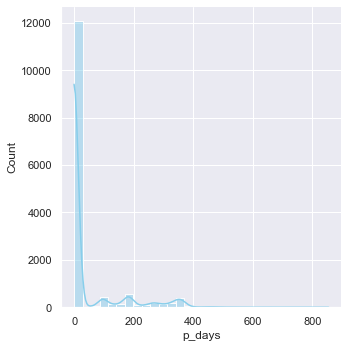

In [30]:
sns.displot(df['p_days'], bins=30, kde=True, color='skyblue')

the data in p_days goes as in train, we'll replace to binary values 

In [31]:
df["conntacted_before"] = df["p_days"].replace(-1, 0)
df["conntacted_before"] = df["conntacted_before"].apply(lambda x: 1 if x >= 1  else  0)

In [32]:
df['conntacted_before'].value_counts()

0    12014
1     2680
Name: conntacted_before, dtype: int64

#### conntacted_before and n_p_contact :

In [33]:
df['n_p_contact'].value_counts()

0     12014
1       891
2       713
3       354
4       221
5       150
6        83
7        75
8        46
10       28
9        23
11       20
13       16
12       16
14        7
15        7
22        4
16        4
19        3
17        3
30        2
24        2
18        2
37        2
32        1
23        1
26        1
20        1
21        1
29        1
38        1
35        1
Name: n_p_contact, dtype: int64

no inconsistance here also 

### n_child 

In [34]:
df['n_child'].value_counts()

unknown      9732
0            1450
1            1425
3 or more    1386
2             701
Name: n_child, dtype: int64

In [35]:
df['n_child1'] = df['n_child']

In [36]:
df['n_child1'] = df['n_child1'].replace('unknown' , -1)
df['n_child1'] = df['n_child1'].replace('0',0.0)
df['n_child1'] = df['n_child1'].replace('1',1.0)
df['n_child1'] = df['n_child1'].replace('2',2.0)
df['n_child1'] = df['n_child1'].replace('3 or more',3.0)

In [37]:
df['n_child1'].value_counts()

-1.0    9732
 0.0    1450
 1.0    1425
 3.0    1386
 2.0     701
Name: n_child1, dtype: int64

### Discretization

 we we'll do it on l_call_duration :very long call, long call,  very short call, short call and averege call

In [38]:
C = df["l_call_duration"].median()
N = 5
W = np.round((C*2)/N)
W

66.0

In [39]:
df.loc[ df['l_call_duration'] <= W, 'call_bin'] = 0
df.loc[(df['l_call_duration'] > W) & (df['l_call_duration'] <= 2*W), 'call_bin'] = 1
df.loc[(df['l_call_duration'] > 2*W) & (df['l_call_duration'] <= 3*W), 'call_bin'] = 2
df.loc[(df['l_call_duration'] > 3*W) & (df['l_call_duration'] <= 4*W), 'call_bin'] = 3
df.loc[ df['l_call_duration'] > 4*W, 'call_bin'] = 4

In [40]:
df['call_bin'].value_counts()

4.0    4275
1.0    3687
2.0    2888
0.0    2021
3.0    1823
Name: call_bin, dtype: int64

### Normalization

age  and account balance in Z-score normalization : Change the data to be with 0 mean and variance 1 

0   -0.380927
1    0.462173
2   -1.130349
3    0.462173
4   -0.942993
Name: age_norm, dtype: float64


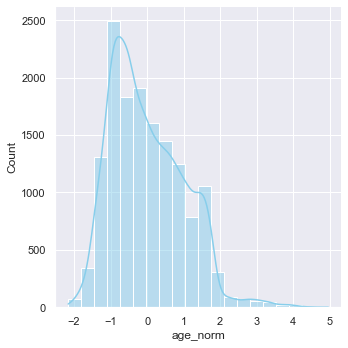

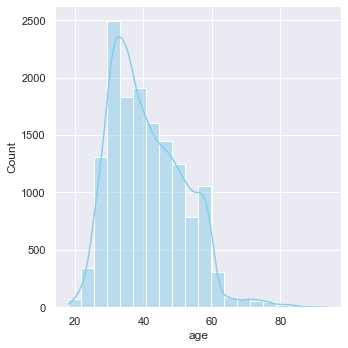

In [41]:
z_scaler = StandardScaler()
z_scaler.fit(pd.DataFrame(df['age']))
df['age_norm'] = z_scaler.transform(pd.DataFrame(df['age']))
print(df['age_norm'].head())
sns.displot(df['age_norm'], bins=20, kde=True, color='skyblue')
sns.displot(df['age'], bins=20, kde=True, color='skyblue')

0   -0.460403
1   -0.540209
2    0.224331
3   -0.230458
4   -0.529641
Name: account_norm, dtype: float64


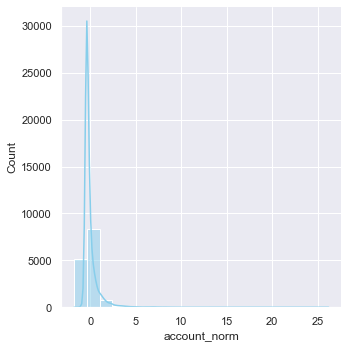

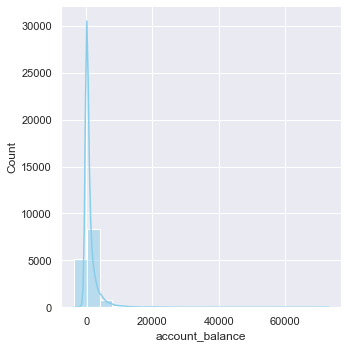

In [42]:
z_scaler = StandardScaler()
z_scaler.fit(pd.DataFrame(df['account_balance']))
df['account_norm'] = z_scaler.transform(pd.DataFrame(df['account_balance']))
print(df['account_norm'].head())
sns.displot(df['account_norm'], bins=20, kde=True, color='skyblue')
sns.displot(df['account_balance'], bins=20, kde=True, color='skyblue')

### dropping data : 

In [43]:
df['campaign_type'].value_counts()

phone call    14694
Name: campaign_type, dtype: int64

In [44]:
df = df.drop(['campaign_type','positive'],axis=1)

In [45]:
df['loan1']=df['loan'].replace([True,False],[1,0])
df['mortgage1']=df['mortgage'].replace([True,False],[1,0])
df['credit1']=df['credit'].replace([True,False],[1,0])

* change status to numeric value : 1 - single , 2 - married , 3 - divorced 

In [46]:
df['status'] = df['status'].replace(["single","married","divorced"],[1,2,3])

In [47]:
df = df.drop(['loan'],axis=1)
df = df.drop(['mortgage'],axis=1)
df = df.drop(['credit'],axis=1)
df = df.drop(['education'],axis=1)
df = df.drop(['n_child'],axis=1)
df = df.drop(['p_days'],axis=1)
df = df.drop(['l_call_duration'],axis=1)
df = df.drop(['device'],axis=1)

In [48]:
df = df.drop(['profession','account_balance','l_date','age'],axis=1)

In [49]:
df.to_csv('marketing_campaigns_test_after_PRE.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14694 entries, 0 to 14693
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             14694 non-null  int64  
 1   n_contact          14694 non-null  int64  
 2   p_outcome          14694 non-null  int64  
 3   n_p_contact        14694 non-null  int64  
 4   education1         14694 non-null  float64
 5   profession1        14694 non-null  int64  
 6   device1            14694 non-null  int64  
 7   conntacted_before  14694 non-null  int64  
 8   n_child1           14694 non-null  float64
 9   call_bin           14694 non-null  float64
 10  age_norm           14694 non-null  float64
 11  account_norm       14694 non-null  float64
 12  loan1              14694 non-null  int64  
 13  mortgage1          14694 non-null  int64  
 14  credit1            14694 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 1.7 MB


In [51]:
df.head()

,status,n_contact,p_outcome,n_p_contact,education1,profession1,device1,conntacted_before,n_child1,call_bin,age_norm,account_norm,loan1,mortgage1,credit1
0,3,2,-1,0,2.0,8,1,0,-1.0,0.0,-0.380927,-0.460403,0,1,0
1,2,1,-1,0,1.0,9,1,0,-1.0,1.0,0.462173,-0.540209,0,1,0
2,1,3,-1,0,3.0,9,1,0,-1.0,0.0,-1.130349,0.224331,0,0,0
3,2,1,-1,0,2.0,10,1,0,-1.0,4.0,0.462173,-0.230458,0,0,0
4,2,2,-1,0,3.0,9,1,0,-1.0,4.0,-0.942993,-0.529641,0,1,0
